# House Price Prediction
By using Regression we can able to predict price of house. By Using Simple Preprocessing and Regression we can able to Predict
House Price

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print(len(test.columns),len(train.columns))

80 81


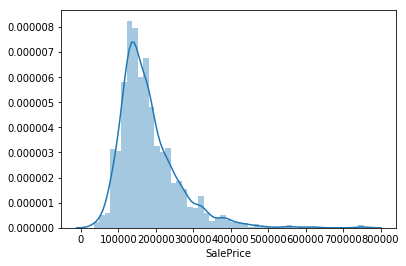

In [3]:
sns.distplot(train['SalePrice'])

In [4]:
print('skewness is',train['SalePrice'].skew())
print('krutosis is ',train['SalePrice'].kurt())

skewness is 1.8828757597682129
krutosis is  6.536281860064529


# Relation ship between continous values

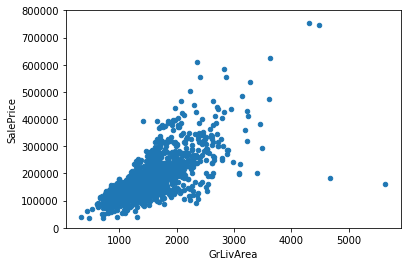

In [5]:
data=pd.concat([train['SalePrice'],train['GrLivArea']],axis=1)
data.plot.scatter(x='GrLivArea',y='SalePrice',ylim=(0,800000))

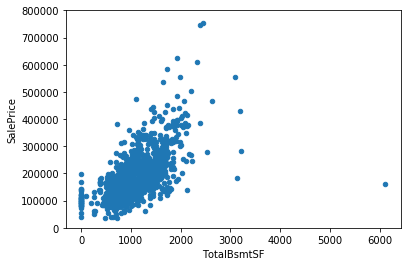

In [6]:
data=pd.concat([train['SalePrice'],train['TotalBsmtSF']],axis=1)
data.plot.scatter(x='TotalBsmtSF',y='SalePrice',ylim=(0,800000))

# Relation ship between categorical values

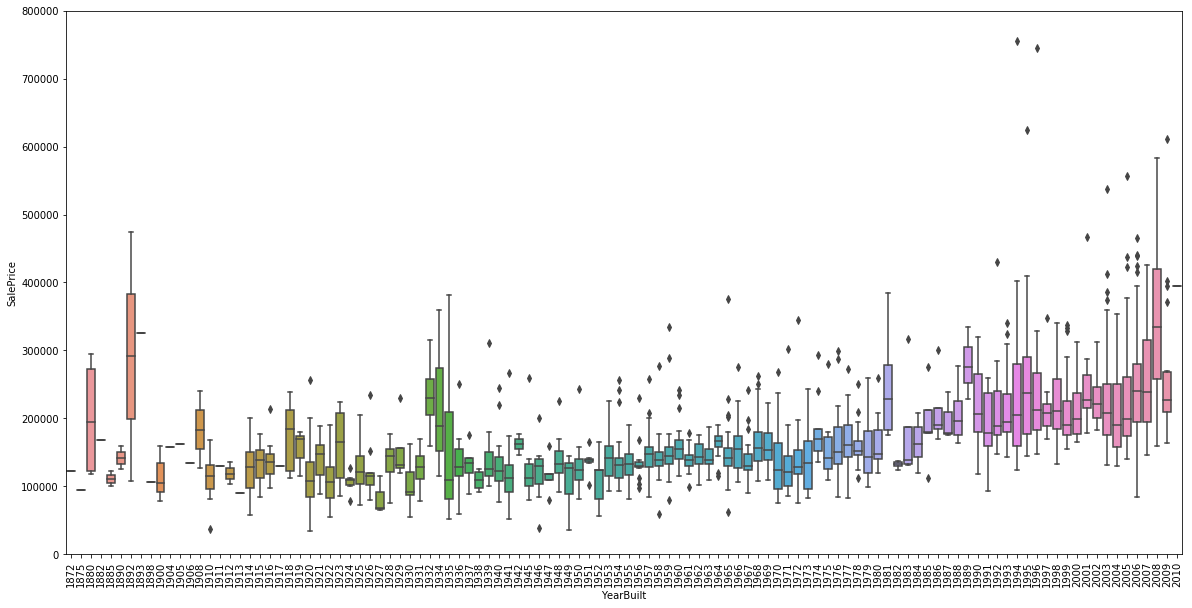

In [7]:

var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

# correlation matrix using heat map to find relation to produce results

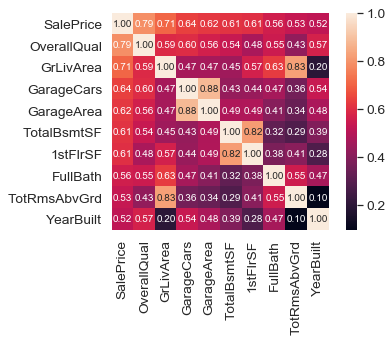

In [8]:
k = 10 #number of variables for heatmap
corrmat = train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Hence the most correlate variable for salePrice are OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath' and 'YearBuilt

C:\Users\aiman\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


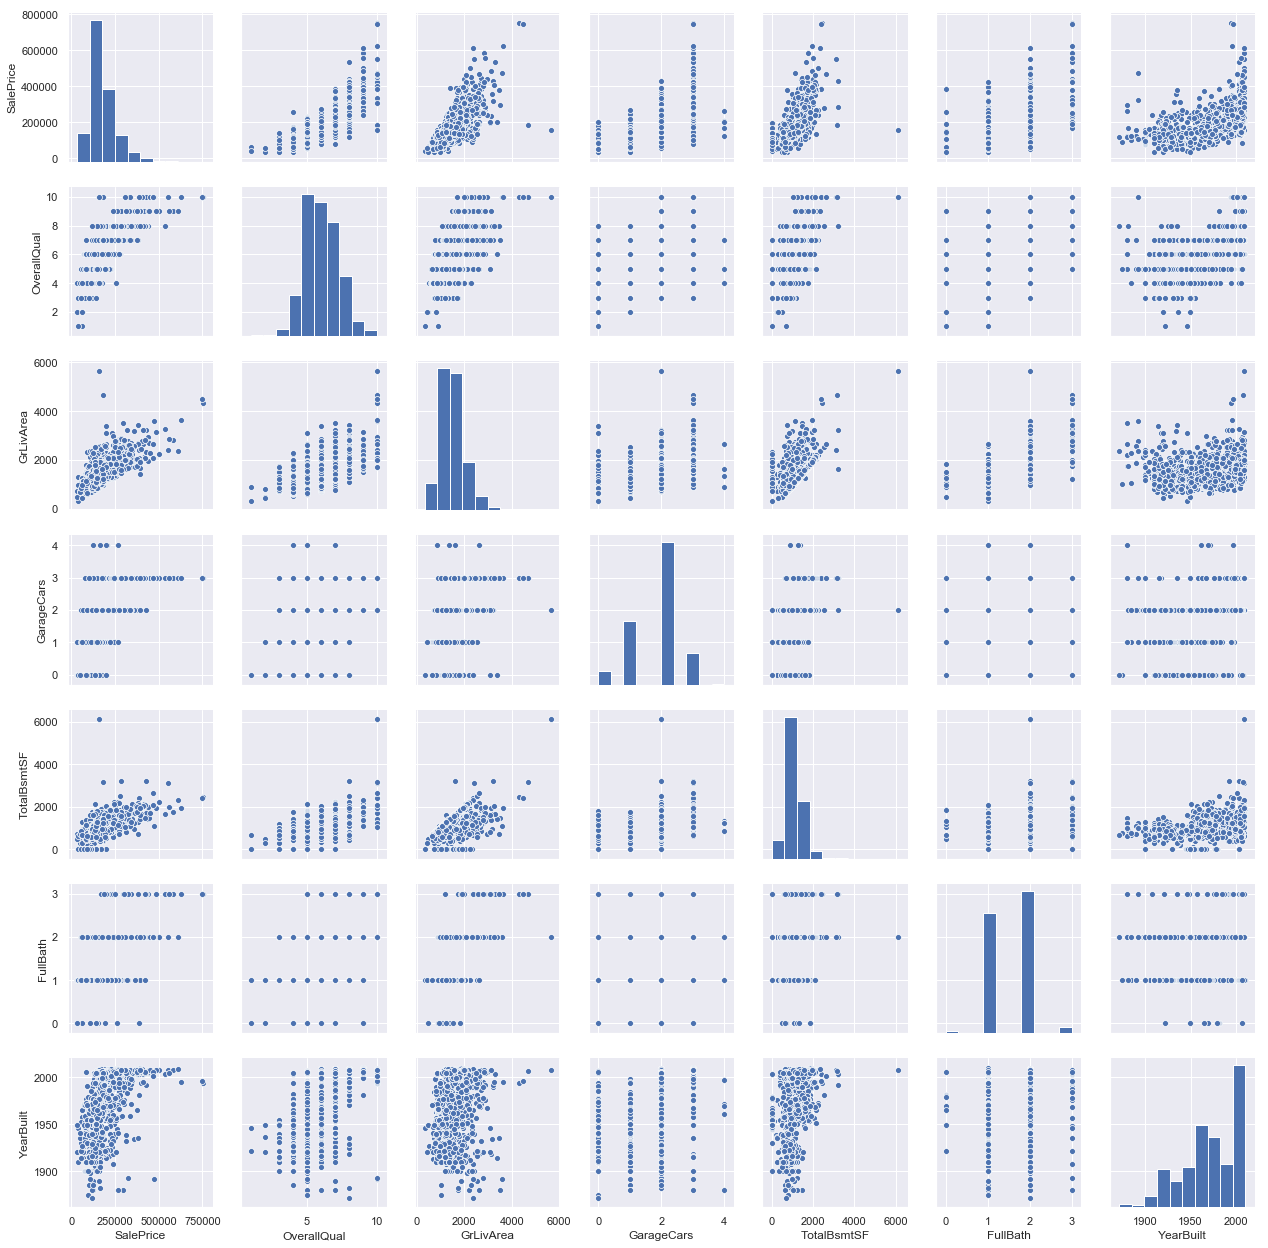

In [9]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

Let us see the way to deal with skewness is demonstrated below

skewness is 1.8828757597682129


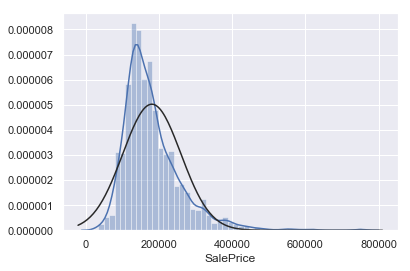

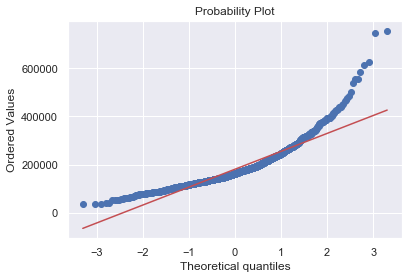

In [10]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
print('skewness is',train['SalePrice'].skew())

In [11]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

skewness after transformation is 0.12133506220520406


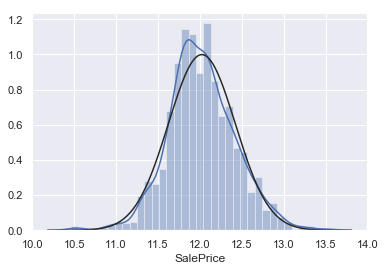

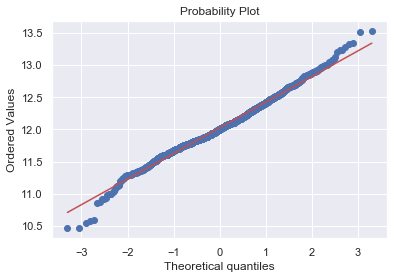

In [12]:
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
print('skewness after transformation is',train['SalePrice'].skew())

# Missing Values

In [13]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [14]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


In [15]:
train=train.drop('Id',axis=1)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


In [16]:
def processing(df):
    cols=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage']
    for col in cols:
        df.drop(col,axis=1,inplace=True)
    num_colm=list(df.select_dtypes(include=['int64','float']).columns.values)
    df[num_colm]=df[num_colm].apply(lambda x:x.fillna(x.median()),axis=0)
    cat_colm=list(df.select_dtypes(exclude=['int64','float','bool']).columns.values)
    df[cat_colm]=df[cat_colm].apply(lambda x:x.fillna('None'),axis=0)
    df=pd.get_dummies(df)
    return df

In [17]:
train=processing(train)
test=processing(test)
display(test.head())

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, make_scorer, mean_squared_error, mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(train.drop("SalePrice",axis=1), np.log(train["SalePrice"]), random_state=42)

# Lasso Regression using Random search

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import ShuffleSplit
lassoReg=Lasso(random_state=86)

In [20]:
cv_set=ShuffleSplit(random_state=86)
param={
    'alpha':np.linspace(0.0005,0.005,100),
    'max_iter':np.linspace(40000,200000,100,dtype='int')
}
Scorer=make_scorer(r2_score)
RandomReg=RandomizedSearchCV(lassoReg,param,scoring=Scorer,cv=cv_set,random_state=86)
Random_fit_lasso = RandomReg.fit(X_train, y_train)
lasso_opt = Random_fit_lasso.best_estimator_
Random_fit_lasso.best_params_

{'max_iter': 77171, 'alpha': 0.001}

In [21]:
lasso_opt.fit(X_train, y_train)
lasso_opt_predict = lasso_opt.predict(X_test)

In [22]:
lasso_r2 = r2_score(y_test, lasso_opt_predict)
lasso_mse = mean_squared_error(y_test, lasso_opt_predict)
lasso_mae = mean_absolute_error(y_test, lasso_opt_predict)
print("R2 : {} \nMSE: {}\nMAE: {}".format(lasso_r2,lasso_mse,lasso_mae))

R2 : 0.8666708334143189 
MSE: 0.00016007377511621183
MAE: 0.008711447753624783
